In [1]:
import pandas as pd

# Load the pickle file
pickle_file = "/content/gender_noun_dims.pickle"  # Update path if needed
data = pd.read_pickle(pickle_file)

# Convert dictionary to DataFrame if needed
if isinstance(data, dict):
    df = pd.DataFrame.from_dict(data, orient="index")
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Feature"}, inplace=True)

# List of columns to drop (including the ones you specified)
columns_to_drop = [
    "ANOVA", "MI", "All non ind", "LR1", "Corr1", "All imp dims1",
    "LR5", "Corr5", "All imp dims5", "LR10", "Corr10", "All imp dims10",
    "LR25", "Corr25", "All imp dims25", "LR50", "Corr50", "All imp dims50",
    "LR75", "Corr75", "All imp dims75",
    # Your specified columns:
    "All dims", "All imp dims5", "LR10", "All imp dims50", "LR75"
]

# Drop columns if they exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")

# Save cleaned DataFrame to CSV
csv_file = "/content/gender_noun_dims_1.csv"  # Update path if needed
df.to_csv(csv_file, index=False)

print(f"✅ Pickle file cleaned and converted to CSV: {csv_file}")


✅ Pickle file cleaned and converted to CSV: /content/gender_noun_dims_1.csv


In [3]:
# Function to clean up perceptron columns by merging sublists into one unique list
def clean_perceptron_column(column):
    cleaned_data = []
    for row in column:
        # Flatten the list and perform union to remove duplicates
        flattened = set([item for sublist in row for item in sublist])
        cleaned_data.append(list(flattened))
    return cleaned_data

# Apply cleaning to each perceptron column (Perc1, Perc5, Perc10, etc.)
for col in ['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']:
    df[col] = clean_perceptron_column(df[col])

# Save cleaned DataFrame to CSV
csv_file = "/content/gender_noun_dims_cleaned.csv"  # Update path if needed
df.to_csv(csv_file, index=False)

print(f"✅ Data cleaned and saved to CSV: {csv_file}")
ekaterina=pd.read_csv('/content/gender_noun_dims_cleaned.csv')
ekaterina.head(3)

✅ Data cleaned and saved to CSV: /content/gender_noun_dims_cleaned.csv


,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flau_small_c,"[162, 100, 434, 245, 377, 507, 316]","[387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...","[256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...","[0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...","[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."
1,flau_base_u,"[130, 546, 456, 138, 671, 433, 17, 307, 81, 21...","[1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...","[1, 2, 515, 516, 5, 519, 9, 522, 525, 17, 21, ...","[0, 1, 2, 5, 9, 10, 11, 13, 15, 17, 21, 24, 25...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,flau_base_c,"[130, 611, 70, 71, 359, 425, 587, 749, 526, 75...","[513, 130, 517, 261, 136, 526, 398, 272, 401, ...","[513, 517, 10, 526, 529, 17, 22, 537, 26, 538,...","[0, 513, 3, 517, 7, 519, 8, 10, 523, 13, 526, ...","[0, 1, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [4]:
unique_features = ekaterina["Feature"].unique()
print(unique_features)
#PercX → Features chosen by Perceptron (Top X%)
ekaterina.columns

['flau_small_c' 'flau_base_u' 'flau_base_c' 'flau_large_c' 'cam_base'
 'xlm_large' 'xlm_base' 'bert_base_u' 'distilbert_base' 'bert_base_c']


Index(['Feature', 'Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75'], dtype='object')

In [5]:
model = 'flau_small_c'  # Example model
perc_column = 'Perc1'  # Example percentage
print(ekaterina[ekaterina['Feature'] == model][perc_column].values)


['[162, 100, 434, 245, 377, 507, 316]']


In [6]:
# Define the models and percentage column
models = ['flau_small_c', 'cam_base']
perc_column = 'Perc1'

# Extract the data for both models and the specified percentage column
data = []

for model in models:
    model_data = ekaterina[ekaterina['Feature'] == model][[perc_column]]
    model_data['Model'] = model  # Add the model name as a new column
    data.append(model_data)

# Combine the data for both models into a single DataFrame
combined_df = pd.concat(data, ignore_index=True)

# Display the result
print(combined_df)


                                               Perc1         Model
0                [162, 100, 434, 245, 377, 507, 316]  flau_small_c
1  [384, 129, 7, 648, 401, 147, 35, 685, 173, 558...      cam_base


In [7]:
import pandas as pd
import re
# Load SHAP feature importance CSV
shap_df = pd.read_csv("/content/shap_feature_importance_all_models.csv")

# Load Ekaterina's stable dimensions
ekaterina_df = pd.read_csv("/content/gender_noun_dims_1.csv")

# Convert features to sets for comparison
shap_dimensions = set(shap_df["Feature"].astype(str))  # Ensure consistency in datatype
# Extract numeric part from SHAP feature names
shap_df["Feature"] = shap_df["Feature"].astype(str).apply(lambda x: re.sub(r"\D", "", x))

# Print quick summary
print(f"✅ Total SHAP Features: {len(shap_dimensions)}")
shap_df

✅ Total SHAP Features: 1024


,Feature,camem_bert_base_embeddings,distilled_bert_base_cased,flaubert_base_cased,flaubert_base_uncased,flaubert_large_uncased,flaubert_small_cased,mbert_base_cased,mbert_base_uncased,xlmr_r_large,xlm_roberta_base,Mean Importance
0,1012,NaN,NaN,NaN,NaN,0.017380,NaN,NaN,NaN,0.052533,NaN,0.034956
1,971,NaN,NaN,NaN,NaN,0.018363,NaN,NaN,NaN,0.039607,NaN,0.028985
2,453,0.005313,0.013851,0.021146,0.025093,0.010345,0.026715,0.107030,0.038046,0.019581,0.001145,0.026827
3,934,NaN,NaN,NaN,NaN,0.024552,NaN,NaN,NaN,0.028338,NaN,0.026445
4,198,0.052400,0.013961,0.006006,0.029648,0.010734,0.043431,0.062678,0.012758,0.022906,0.001636,0.025616
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,1004,NaN,NaN,NaN,NaN,0.003230,NaN,NaN,NaN,0.001427,NaN,0.002329
1020,834,NaN,NaN,NaN,NaN,0.002809,NaN,NaN,NaN,0.001564,NaN,0.002187
1021,833,NaN,NaN,NaN,NaN,0.003884,NaN,NaN,NaN,0.000281,NaN,0.002083
1022,1019,NaN,NaN,NaN,NaN,0.000921,NaN,NaN,NaN,0.002310,NaN,0.001616


In [19]:
# Your mapping: Ekaterina → SHAP model names
ekaterina_to_shap_mapping = {
    'cam_base': 'camem_bert_base_embeddings',
    'distilbert_base': 'distilled_bert_base_cased',
    'flau_base_c': 'flaubert_base_cased',
    'flau_base_u': 'flaubert_base_uncased',
    'flau_large_c': 'flaubert_large_uncased',
    'flau_small_c': 'flaubert_small_cased',
    'bert_base_c': 'mbert_base_cased',
    'bert_base_u': 'mbert_base_uncased',
    'xlm_large': 'xlmr_r_large',
    'xlm_base': 'xlm_roberta_base'
}

# Apply the mapping to the Feature column
ekaterina['Feature'] = ekaterina['Feature'].replace(ekaterina_to_shap_mapping)
ekaterina.to_csv("ekaterina_new.csv", index=False)


In [20]:
ekaterina

,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flaubert_small_cased,"[162, 100, 434, 245, 377, 507, 316]","[387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...","[256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...","[0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...","[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."
1,flaubert_base_uncased,"[130, 546, 456, 138, 671, 433, 17, 307, 81, 21...","[1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...","[1, 2, 515, 516, 5, 519, 9, 522, 525, 17, 21, ...","[0, 1, 2, 5, 9, 10, 11, 13, 15, 17, 21, 24, 25...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,flaubert_base_cased,"[130, 611, 70, 71, 359, 425, 587, 749, 526, 75...","[513, 130, 517, 261, 136, 526, 398, 272, 401, ...","[513, 517, 10, 526, 529, 17, 22, 537, 26, 538,...","[0, 513, 3, 517, 7, 519, 8, 10, 523, 13, 526, ...","[0, 1, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,flaubert_large_uncased,"[136, 552, 972, 15, 760, 862, 274, 182, 342, 1...","[518, 15, 24, 33, 39, 552, 56, 575, 64, 584, 8...","[518, 511, 12, 13, 524, 15, 24, 539, 33, 39, 5...","[2, 3, 6, 12, 13, 15, 24, 33, 34, 35, 39, 40, ...","[1, 2, 3, 6, 8, 10, 11, 12, 13, 14, 15, 18, 20...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,camem_bert_base_embeddings,"[384, 129, 7, 648, 401, 147, 35, 685, 173, 558...","[512, 2, 6, 7, 523, 16, 18, 530, 531, 21, 539,...","[512, 2, 6, 7, 523, 525, 526, 15, 16, 529, 18,...","[0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 15, 16, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,xlmr_r_large,"[136, 908, 526, 24, 153, 934, 939, 940, 173, 4...","[0, 520, 521, 522, 526, 527, 18, 24, 27, 540, ...","[0, 4, 10, 15, 17, 18, 23, 24, 27, 30, 32, 40,...","[0, 1, 3, 4, 5, 6, 7, 10, 11, 15, 17, 18, 19, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,xlm_roberta_base,"[257, 517, 135, 12, 268, 397, 527, 272, 39, 43...","[512, 517, 522, 12, 13, 524, 15, 527, 22, 29, ...","[512, 1, 4, 517, 9, 522, 12, 13, 524, 15, 527,...","[1, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,mbert_base_uncased,"[515, 643, 517, 10, 11, 270, 15, 145, 665, 412...","[515, 517, 519, 521, 10, 11, 524, 15, 18, 541,...","[1, 515, 517, 519, 520, 7, 10, 11, 524, 521, 1...","[1, 2, 3, 6, 7, 10, 11, 12, 13, 15, 16, 17, 18...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
8,distilled_bert_base_cased,"[320, 1, 673, 353, 196, 677, 37, 488, 713, 76,...","[512, 1, 515, 4, 517, 7, 9, 13, 531, 25, 31, 3...","[512, 1, 515, 4, 517, 7, 9, 10, 13, 526, 531, ...","[0, 1, 2, 4, 5, 7, 9, 10, 13, 23, 25, 31, 33, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
9,mbert_base_cased,"[704, 610, 195, 548, 742, 135, 270, 208, 721, ...","[514, 520, 525, 20, 23, 537, 30, 31, 33, 546, ...","[512, 514, 7, 520, 522, 11, 525, 531, 20, 534,...","[0, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 16, 19, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [8]:
shap_models = [col for col in shap_df.columns if col not in ["Feature", "Mean Importance"]]
shap_models

['camem_bert_base_embeddings',
 'distilled_bert_base_cased',
 'flaubert_base_cased',
 'flaubert_base_uncased',
 'flaubert_large_uncased',
 'flaubert_small_cased',
 'mbert_base_cased',
 'mbert_base_uncased',
 'xlmr_r_large',
 'xlm_roberta_base']

In [9]:
import pandas as pd
# Load LIME feature importance CSV
lime_df = pd.read_csv("/content/lime_feature_importance_all_models.csv", index_col=0)
lime_dimensions = set(lime_df.index.astype(str))  # Use index since LIME features are stored there

print(f"✅ Total LIME Features: {len(lime_dimensions)}")



✅ Total LIME Features: 1024


In [10]:
import pandas as pd
import re

# ✅ Fix 1: Reset Index to make dimensions a column
lime_df.reset_index(inplace=True)
lime_df.rename(columns={"index": "Feature"}, inplace=True)

# ✅ Fix 2: Extract and clean model names (remove tuple formatting)
lime_models = lime_df.columns[1:]  # Exclude 'Feature' column
clean_lime_models = {model: re.sub(r"[\(\)']", "", model).split(",")[0].strip() for model in lime_models}

# ✅ Fix 3: Ensure 'Feature' column contains only numbers
lime_df["Feature"] = lime_df["Feature"].astype(str).apply(lambda x: re.sub(r"\D", "", x))

# ✅ Apply clean_lime_models to DataFrame columns
lime_df.rename(columns=clean_lime_models, inplace=True)
# Check updated dataframe and cleaned model names
lime_df.head()


,Feature,camem_bert_base_embeddings,distilled_bert_base_cased,flaubert_base_cased,flaubert_base_uncased,flaubert_large_uncased,flaubert_small_cased,mbert_base_cased,mbert_base_uncased,xlmr_r_large,xlm_roberta_base
0,0,0.013925,0.005983,0.012370,0.019074,0.011425,0.012511,0.0,0.016796,0.000084,0.0
1,1,0.025022,0.010357,0.015995,0.013978,0.012045,0.012298,0.0,0.016507,0.000091,0.0
2,2,0.013153,0.017594,0.027113,0.021994,0.010257,0.025812,0.0,0.013349,0.000093,0.0
3,3,0.015289,0.008120,0.015632,0.017206,0.012873,0.021776,0.0,0.012940,0.000062,0.0
4,4,0.011512,0.008155,0.015627,0.019182,0.015790,0.019761,0.0,0.011371,0.000088,0.0


In [11]:
lime_models = [col for col in lime_df.columns if col not in ["Feature"]]
lime_models

['camem_bert_base_embeddings',
 'distilled_bert_base_cased',
 'flaubert_base_cased',
 'flaubert_base_uncased',
 'flaubert_large_uncased',
 'flaubert_small_cased',
 'mbert_base_cased',
 'mbert_base_uncased',
 'xlmr_r_large',
 'xlm_roberta_base']

In [12]:
# Define percentage levels for SHAP-selected features (1%, 5%, 10%, 25%, 50%, 75%)
top_feature_percentages = [1,5,10,25, 50,75]

# Dictionary to store top features per model and percentage
top_shap_features = {}

# Loop through each model to extract top SHAP features based on importance scores
for model in shap_models:
    top_shap_features[model] = {}

    print(f"\n🔹 Extracted Top SHAP Features for Model: **{model}**")

    #  Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        num_features = int((percent / 100) * len(shap_df))  # Compute number of top features

        # Sort the SHAP dataframe by the importance values for the current model
        sorted_shap_df = shap_df.sort_values(by=model, ascending=False)
        #Select the top N features
        selected_features = sorted_shap_df.iloc[:num_features]["Feature"].tolist()

       # Store the selected top features for the current model and percentage
        top_shap_features[model][percent] = set(selected_features)

        # Print formatted output
        print(f"   ✅ Top {percent}% SHAP Features: {len(top_shap_features[model][percent])}")
        print(f"   🔹 Sample Features: {list(top_shap_features[model][percent])[:10]}")

    print("-" * 60)  # Add separator for readability



🔹 Extracted Top SHAP Features for Model: **camem_bert_base_embeddings**
   ✅ Top 1% SHAP Features: 10
   🔹 Sample Features: ['198', '454', '23', '579', '714', '144', '147', '692', '713', '465']
   ✅ Top 5% SHAP Features: 51
   🔹 Sample Features: ['420', '450', '42', '234', '435', '144', '147', '73', '713', '8']
   ✅ Top 10% SHAP Features: 102
   🔹 Sample Features: ['552', '8', '204', '408', '549', '122', '168', '459', '69', '95']
   ✅ Top 25% SHAP Features: 256
   🔹 Sample Features: ['416', '352', '488', '129', '203', '552', '676', '47', '360', '626']
   ✅ Top 50% SHAP Features: 512
   🔹 Sample Features: ['416', '352', '138', '488', '681', '203', '552', '359', '676', '575']
   ✅ Top 75% SHAP Features: 768
   🔹 Sample Features: ['416', '352', '138', '488', '681', '203', '552', '359', '676', '575']
------------------------------------------------------------

🔹 Extracted Top SHAP Features for Model: **distilled_bert_base_cased**
   ✅ Top 1% SHAP Features: 10
   🔹 Sample Features: ['70',

In [21]:
import pandas as pd

# Prepare list of rows for the DataFrame
data_for_df = []

for model in top_shap_features:
    row = {'Feature': model}
    for percent in top_feature_percentages:
        row[f'Top_{percent}'] = list(top_shap_features[model][percent])  # convert set to list for saving
    data_for_df.append(row)

# Create the DataFrame
shap_top_features_df = pd.DataFrame(data_for_df)
# Save to CSV
shap_top_features_df.to_csv("shap_top_features_by_model.csv", index=False)


# Show sample
shap_top_features_df


,Feature,Top_1,Top_5,Top_10,Top_25,Top_50,Top_75
0,camem_bert_base_embeddings,"[198, 454, 23, 579, 714, 144, 147, 692, 713, 465]","[420, 450, 42, 234, 435, 144, 147, 73, 713, 8,...","[552, 8, 204, 408, 549, 122, 168, 459, 69, 95,...","[416, 352, 488, 129, 203, 552, 676, 47, 360, 6...","[416, 352, 138, 488, 681, 203, 552, 359, 676, ...","[416, 352, 138, 488, 681, 203, 552, 359, 676, ..."
1,distilled_bert_base_cased,"[70, 646, 540, 762, 474, 282, 354, 652, 643, 124]","[70, 176, 671, 54, 473, 203, 724, 118, 762, 67...","[502, 203, 209, 762, 676, 143, 57, 689, 652, 2...","[416, 352, 138, 760, 502, 203, 552, 209, 762, ...","[416, 352, 138, 203, 552, 209, 676, 323, 143, ...","[416, 352, 138, 488, 681, 203, 552, 209, 676, ..."
2,flaubert_base_cased,"[224, 212, 135, 38, 668, 674, 359, 428, 179, 587]","[698, 263, 38, 359, 68, 21, 602, 112, 2, 283, ...","[681, 359, 68, 762, 157, 339, 399, 168, 674, 5...","[681, 501, 359, 68, 762, 47, 251, 535, 360, 57...","[681, 488, 359, 552, 323, 575, 676, 10, 444, 3...","[416, 352, 138, 681, 488, 203, 359, 552, 323, ..."
3,flaubert_base_uncased,"[644, 191, 407, 543, 626, 630, 396, 139, 752, ...","[420, 617, 361, 191, 256, 210, 218, 328, 681, ...","[681, 108, 201, 68, 626, 561, 408, 168, 674, 6...","[110, 681, 502, 108, 201, 68, 209, 315, 626, 5...","[416, 138, 681, 203, 359, 209, 323, 676, 143, ...","[416, 138, 352, 681, 488, 203, 359, 209, 323, ..."
4,flaubert_large_uncased,"[671, 80, 129, 1022, 262, 354, 66, 27, 56, 864]","[671, 934, 844, 919, 129, 994, 1022, 120, 209,...","[812, 129, 209, 762, 561, 10, 406, 80, 771, 41...","[960, 352, 812, 145, 760, 129, 108, 980, 209, ...","[352, 804, 488, 681, 203, 359, 209, 676, 323, ...","[352, 804, 488, 681, 203, 359, 209, 676, 323, ..."
5,flaubert_small_cased,"[198, 377, 265, 390, 391, 195, 192, 350, 468, ...","[269, 42, 458, 488, 54, 300, 209, 251, 360, 35...","[488, 359, 209, 251, 360, 79, 199, 8, 399, 459...","[110, 488, 237, 315, 359, 209, 505, 402, 251, ...","[352, 138, 416, 488, 203, 359, 209, 323, 143, ...","[352, 138, 416, 804, 488, 681, 203, 359, 209, ..."
6,mbert_base_cased,"[758, 427, 32, 357, 120, 277, 336, 98, 639, 453]","[416, 483, 120, 501, 304, 386, 565, 277, 301, ...","[416, 237, 501, 47, 311, 762, 133, 278, 720, 3...","[416, 138, 145, 457, 237, 501, 108, 315, 209, ...","[416, 138, 359, 209, 552, 143, 10, 549, 333, 6...","[416, 138, 352, 488, 681, 203, 359, 209, 552, ..."
7,mbert_base_uncased,"[106, 485, 451, 593, 545, 555, 332, 754, 482, ...","[269, 106, 364, 234, 129, 84, 681, 137, 125, 6...","[106, 681, 129, 760, 360, 516, 199, 754, 408, ...","[106, 681, 129, 760, 315, 762, 47, 360, 575, 5...","[416, 138, 681, 552, 209, 359, 575, 615, 143, ...","[416, 138, 352, 681, 488, 203, 552, 209, 359, ..."
8,xlmr_r_large,"[417, 22, 122, 851, 600, 826, 588, 341, 838, 1...","[450, 804, 871, 848, 137, 601, 528, 677, 972, ...","[804, 30, 359, 552, 528, 894, 122, 720, 546, 6...","[145, 804, 856, 129, 30, 359, 552, 209, 762, 3...","[352, 804, 488, 359, 552, 209, 575, 143, 333, ...","[352, 138, 804, 488, 681, 203, 359, 552, 209, ..."
9,xlm_roberta_base,"[263, 22, 731, 527, 91, 640, 217, 611, 484, 264]","[458, 263, 138, 70, 154, 488, 286, 378, 586, 6...","[138, 488, 501, 615, 687, 481, 217, 431, 9, 34...","[416, 138, 488, 501, 315, 359, 68, 505, 615, 5...","[416, 138, 352, 488, 681, 359, 676, 615, 10, 4...","[416, 138, 352, 488, 681, 203, 359, 323, 676, ..."


In [13]:
# Define percentage levels for SHAP-selected features (1%, 5%, 10%, 25%, 50%, 75%)
top_feature_percentages = [1,5,10,25, 50,75]

# Dictionary to store top features per model and percentage
top_lime_features = {}

# Loop through each model to extract top SHAP features based on importance scores
for model in lime_models:
    top_lime_features[model] = {}

    print(f"\n🔹 Extracted Top LIME Features for Model: **{model}**")

    #  Loop through each percentage (1%, 5%, 10%, 25%, 50%, 75%)
    for percent in top_feature_percentages:
        num_features = int((percent / 100) * len(lime_df))  # Compute number of top features

        # Sort the SHAP dataframe by the importance values for the current model
        sorted_LIME_df = lime_df.sort_values(by=model, ascending=False)
        #Select the top N features
        selected_features = sorted_LIME_df.iloc[:num_features]["Feature"].tolist()

       # Store the selected top features for the current model and percentage
        top_lime_features[model][percent] = set(selected_features)

        # Print formatted output
        print(f"   ✅ Top {percent}% LIME Features: {len(top_lime_features[model][percent])}")
        print(f"   🔹 Sample Features: {list(top_lime_features[model][percent])[:10]}")

    print("-" * 60)  # Add separator for readability



🔹 Extracted Top LIME Features for Model: **camem_bert_base_embeddings**
   ✅ Top 1% LIME Features: 10
   🔹 Sample Features: ['23', '714', '600', '144', '274', '309', '692', '713', '434', '465']
   ✅ Top 5% LIME Features: 51
   🔹 Sample Features: ['420', '42', '272', '450', '176', '234', '435', '144', '147', '73']
   ✅ Top 10% LIME Features: 102
   🔹 Sample Features: ['359', '204', '8', '549', '278', '399', '168', '459', '29', '69']
   ✅ Top 25% LIME Features: 256
   🔹 Sample Features: ['416', '352', '488', '203', '359', '552', '676', '575', '360', '626']
   ✅ Top 50% LIME Features: 512
   🔹 Sample Features: ['416', '352', '138', '488', '681', '203', '359', '552', '676', '575']
   ✅ Top 75% LIME Features: 768
   🔹 Sample Features: ['416', '352', '138', '488', '681', '203', '359', '552', '676', '575']
------------------------------------------------------------

🔹 Extracted Top LIME Features for Model: **distilled_bert_base_cased**
   ✅ Top 1% LIME Features: 10
   🔹 Sample Features: ['6

In [14]:
# Print a sample of data from the PercX columns to understand its format
sample_model = ekaterina.iloc[0]  # Inspect the first row (or any specific row)
print("Sample data for PercX columns:", sample_model[['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']])


Sample data for PercX columns: Perc1                   [162, 100, 434, 245, 377, 507, 316]
Perc5     [387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...
Perc10    [256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...
Perc25    [0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...
Perc50    [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...
Perc75    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...
Name: 0, dtype: object


In [15]:
import pandas as pd
import random

# Assuming 'df' is the dataframe with the cleaned data

# Iterate over each model in the dataset
for index, row in df.iterrows():
    model_name = row['Feature']
    print(f"🔹 Extracted Top ekaterina Features for Model: {model_name}")

    # Iterate over each PercX (1%, 5%, 10%, etc.)
    for perc in ['Perc1', 'Perc5', 'Perc10', 'Perc25', 'Perc50', 'Perc75']:
        perc_features = row[perc]  # List of features for the current PercX

        # Get the number of top features based on the PercX (1%, 5%, 10%, etc.)
        top_n = len(perc_features)

        # Print the percentage and sample of the features
        print(f"   ✅ Top {perc[4:]}%: {top_n}")
        print(f"   🔹 Sample Features: {random.sample(perc_features, min(10, len(perc_features)))}")

    print("\n")  # For spacing between models


🔹 Extracted Top ekaterina Features for Model: flau_small_c
   ✅ Top 1%: 7
   🔹 Sample Features: [245, 100, 377, 316, 507, 434, 162]
   ✅ Top 5%: 33
   🔹 Sample Features: [292, 434, 202, 499, 162, 115, 234, 7, 468, 387]
   ✅ Top 10%: 67
   🔹 Sample Features: [133, 443, 255, 256, 387, 202, 234, 292, 276, 362]
   ✅ Top 25%: 158
   🔹 Sample Features: [141, 130, 249, 287, 210, 382, 482, 59, 279, 42]
   ✅ Top 50%: 315
   🔹 Sample Features: [119, 310, 82, 441, 100, 357, 203, 340, 276, 460]
   ✅ Top 75%: 450
   🔹 Sample Features: [402, 248, 244, 378, 254, 97, 418, 160, 207, 198]


🔹 Extracted Top ekaterina Features for Model: flau_base_u
   ✅ Top 1%: 14
   🔹 Sample Features: [456, 81, 21, 696, 382, 546, 508, 307, 130, 138]
   ✅ Top 5%: 78
   🔹 Sample Features: [757, 412, 314, 573, 671, 698, 2, 47, 333, 702]
   ✅ Top 10%: 143
   🔹 Sample Features: [93, 638, 519, 374, 2, 229, 140, 627, 198, 300]
   ✅ Top 25%: 333
   🔹 Sample Features: [731, 290, 449, 197, 444, 520, 505, 363, 459, 386]
   ✅ Top 5

In [22]:
import pandas as pd

# Prepare list of rows for the DataFrame
data_for_df_lime = []

for model in top_lime_features:
    row = {'Feature': model}
    for percent in top_feature_percentages:
        row[f'Top_{percent}'] = list(top_lime_features[model][percent])  # convert set to list
    data_for_df_lime.append(row)

# Create the DataFrame
lime_top_features_df = pd.DataFrame(data_for_df_lime)

# Save to CSV
lime_top_features_df.to_csv("lime_top_features_by_model.csv", index=False)

# Show sample
lime_top_features_df.head()


,Feature,Top_1,Top_5,Top_10,Top_25,Top_50,Top_75
0,camem_bert_base_embeddings,"[23, 714, 600, 144, 274, 309, 692, 713, 434, 465]","[420, 42, 272, 450, 176, 234, 435, 144, 147, 7...","[359, 204, 8, 549, 278, 399, 168, 459, 29, 69,...","[416, 352, 488, 203, 359, 552, 676, 575, 360, ...","[416, 352, 138, 488, 681, 203, 359, 552, 676, ...","[416, 352, 138, 488, 681, 203, 359, 552, 676, ..."
1,distilled_bert_base_cased,"[646, 715, 331, 762, 78, 474, 282, 643, 2, 721]","[70, 671, 715, 724, 473, 665, 452, 342, 762, 6...","[203, 762, 676, 311, 143, 57, 122, 533, 652, 6...","[416, 352, 760, 502, 203, 209, 762, 676, 311, ...","[416, 352, 138, 681, 488, 203, 552, 209, 676, ...","[416, 352, 138, 681, 488, 203, 552, 209, 676, ..."
2,flaubert_base_cased,"[224, 212, 407, 135, 359, 674, 428, 426, 594, ...","[698, 483, 726, 359, 205, 112, 212, 704, 220, ...","[681, 359, 68, 762, 10, 339, 399, 168, 674, 51...","[681, 488, 501, 359, 68, 762, 47, 251, 535, 36...","[416, 681, 488, 203, 359, 323, 552, 575, 10, 4...","[416, 352, 138, 681, 488, 203, 359, 323, 552, ..."
3,flaubert_base_uncased,"[191, 543, 565, 626, 396, 630, 580, 752, 139, ...","[420, 617, 191, 221, 328, 218, 681, 68, 543, 5...","[681, 68, 209, 626, 561, 408, 674, 687, 374, 1...","[110, 681, 502, 108, 201, 68, 209, 323, 626, 3...","[416, 138, 681, 359, 209, 323, 143, 444, 674, ...","[416, 138, 352, 681, 488, 203, 359, 209, 323, ..."
4,flaubert_large_uncased,"[352, 1022, 209, 354, 89, 66, 27, 618, 56, 864]","[953, 352, 671, 919, 994, 129, 1022, 120, 230,...","[352, 129, 209, 505, 762, 561, 10, 406, 80, 77...","[960, 352, 812, 145, 129, 980, 359, 209, 505, ...","[352, 488, 681, 203, 359, 209, 676, 323, 846, ...","[352, 804, 488, 681, 203, 359, 209, 676, 323, ..."


# Common features

In [25]:
import pandas as pd

# Read SHAP top features
shap_top_features_df = pd.read_csv("shap_top_features_by_model.csv", converters={f'Top_{p}': eval for p in [1, 5, 10, 25, 50, 75]})

# Read LIME top features
lime_top_features_df = pd.read_csv("lime_top_features_by_model.csv", converters={f'Top_{p}': eval for p in [1, 5, 10, 25, 50, 75]})

# Read Ekaterina features
ekaterina_df = pd.read_csv("ekaterina_new.csv", converters={f'Perc{p}': eval for p in [1, 5, 10, 25, 50, 75]})



In [26]:
# Display heads for confirmation
print("SHAP:")
shap_top_features_df.head()



SHAP:


,Feature,Top_1,Top_5,Top_10,Top_25,Top_50,Top_75
0,camem_bert_base_embeddings,"[198, 454, 23, 579, 714, 144, 147, 692, 713, 465]","[420, 450, 42, 234, 435, 144, 147, 73, 713, 8,...","[552, 8, 204, 408, 549, 122, 168, 459, 69, 95,...","[416, 352, 488, 129, 203, 552, 676, 47, 360, 6...","[416, 352, 138, 488, 681, 203, 552, 359, 676, ...","[416, 352, 138, 488, 681, 203, 552, 359, 676, ..."
1,distilled_bert_base_cased,"[70, 646, 540, 762, 474, 282, 354, 652, 643, 124]","[70, 176, 671, 54, 473, 203, 724, 118, 762, 67...","[502, 203, 209, 762, 676, 143, 57, 689, 652, 2...","[416, 352, 138, 760, 502, 203, 552, 209, 762, ...","[416, 352, 138, 203, 552, 209, 676, 323, 143, ...","[416, 352, 138, 488, 681, 203, 552, 209, 676, ..."
2,flaubert_base_cased,"[224, 212, 135, 38, 668, 674, 359, 428, 179, 587]","[698, 263, 38, 359, 68, 21, 602, 112, 2, 283, ...","[681, 359, 68, 762, 157, 339, 399, 168, 674, 5...","[681, 501, 359, 68, 762, 47, 251, 535, 360, 57...","[681, 488, 359, 552, 323, 575, 676, 10, 444, 3...","[416, 352, 138, 681, 488, 203, 359, 552, 323, ..."
3,flaubert_base_uncased,"[644, 191, 407, 543, 626, 630, 396, 139, 752, ...","[420, 617, 361, 191, 256, 210, 218, 328, 681, ...","[681, 108, 201, 68, 626, 561, 408, 168, 674, 6...","[110, 681, 502, 108, 201, 68, 209, 315, 626, 5...","[416, 138, 681, 203, 359, 209, 323, 676, 143, ...","[416, 138, 352, 681, 488, 203, 359, 209, 323, ..."
4,flaubert_large_uncased,"[671, 80, 129, 1022, 262, 354, 66, 27, 56, 864]","[671, 934, 844, 919, 129, 994, 1022, 120, 209,...","[812, 129, 209, 762, 561, 10, 406, 80, 771, 41...","[960, 352, 812, 145, 760, 129, 108, 980, 209, ...","[352, 804, 488, 681, 203, 359, 209, 676, 323, ...","[352, 804, 488, 681, 203, 359, 209, 676, 323, ..."


In [27]:

print("LIME:")
lime_top_features_df.head()

LIME:


,Feature,Top_1,Top_5,Top_10,Top_25,Top_50,Top_75
0,camem_bert_base_embeddings,"[23, 714, 600, 144, 274, 309, 692, 713, 434, 465]","[420, 42, 272, 450, 176, 234, 435, 144, 147, 7...","[359, 204, 8, 549, 278, 399, 168, 459, 29, 69,...","[416, 352, 488, 203, 359, 552, 676, 575, 360, ...","[416, 352, 138, 488, 681, 203, 359, 552, 676, ...","[416, 352, 138, 488, 681, 203, 359, 552, 676, ..."
1,distilled_bert_base_cased,"[646, 715, 331, 762, 78, 474, 282, 643, 2, 721]","[70, 671, 715, 724, 473, 665, 452, 342, 762, 6...","[203, 762, 676, 311, 143, 57, 122, 533, 652, 6...","[416, 352, 760, 502, 203, 209, 762, 676, 311, ...","[416, 352, 138, 681, 488, 203, 552, 209, 676, ...","[416, 352, 138, 681, 488, 203, 552, 209, 676, ..."
2,flaubert_base_cased,"[224, 212, 407, 135, 359, 674, 428, 426, 594, ...","[698, 483, 726, 359, 205, 112, 212, 704, 220, ...","[681, 359, 68, 762, 10, 339, 399, 168, 674, 51...","[681, 488, 501, 359, 68, 762, 47, 251, 535, 36...","[416, 681, 488, 203, 359, 323, 552, 575, 10, 4...","[416, 352, 138, 681, 488, 203, 359, 323, 552, ..."
3,flaubert_base_uncased,"[191, 543, 565, 626, 396, 630, 580, 752, 139, ...","[420, 617, 191, 221, 328, 218, 681, 68, 543, 5...","[681, 68, 209, 626, 561, 408, 674, 687, 374, 1...","[110, 681, 502, 108, 201, 68, 209, 323, 626, 3...","[416, 138, 681, 359, 209, 323, 143, 444, 674, ...","[416, 138, 352, 681, 488, 203, 359, 209, 323, ..."
4,flaubert_large_uncased,"[352, 1022, 209, 354, 89, 66, 27, 618, 56, 864]","[953, 352, 671, 919, 994, 129, 1022, 120, 230,...","[352, 129, 209, 505, 762, 561, 10, 406, 80, 77...","[960, 352, 812, 145, 129, 980, 359, 209, 505, ...","[352, 488, 681, 203, 359, 209, 676, 323, 846, ...","[352, 804, 488, 681, 203, 359, 209, 676, 323, ..."


In [28]:

print("Ekaterina:")
ekaterina_df.head()

Ekaterina:


,Feature,Perc1,Perc5,Perc10,Perc25,Perc50,Perc75
0,flaubert_small_cased,"[162, 100, 434, 245, 377, 507, 316]","[387, 133, 390, 7, 5, 28, 162, 292, 434, 306, ...","[256, 387, 133, 5, 7, 390, 261, 265, 403, 20, ...","[0, 4, 5, 7, 11, 16, 20, 25, 27, 28, 30, 36, 4...","[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."
1,flaubert_base_uncased,"[130, 546, 456, 138, 671, 433, 17, 307, 81, 21...","[1, 2, 5, 17, 21, 546, 36, 45, 47, 572, 573, 5...","[1, 2, 515, 516, 5, 519, 9, 522, 525, 17, 21, ...","[0, 1, 2, 5, 9, 10, 11, 13, 15, 17, 21, 24, 25...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,flaubert_base_cased,"[130, 611, 70, 71, 359, 425, 587, 749, 526, 75...","[513, 130, 517, 261, 136, 526, 398, 272, 401, ...","[513, 517, 10, 526, 529, 17, 22, 537, 26, 538,...","[0, 513, 3, 517, 7, 519, 8, 10, 523, 13, 526, ...","[0, 1, 3, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,flaubert_large_uncased,"[136, 552, 972, 15, 760, 862, 274, 182, 342, 1...","[518, 15, 24, 33, 39, 552, 56, 575, 64, 584, 8...","[518, 511, 12, 13, 524, 15, 24, 539, 33, 39, 5...","[2, 3, 6, 12, 13, 15, 24, 33, 34, 35, 39, 40, ...","[1, 2, 3, 6, 8, 10, 11, 12, 13, 14, 15, 18, 20...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,camem_bert_base_embeddings,"[384, 129, 7, 648, 401, 147, 35, 685, 173, 558...","[512, 2, 6, 7, 523, 16, 18, 530, 531, 21, 539,...","[512, 2, 6, 7, 523, 525, 526, 15, 16, 529, 18,...","[0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 15, 16, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [40]:
models = ekaterina['Feature'].tolist()
models

['flaubert_small_cased',
 'flaubert_base_uncased',
 'flaubert_base_cased',
 'flaubert_large_uncased',
 'camem_bert_base_embeddings',
 'xlmr_r_large',
 'xlm_roberta_base',
 'mbert_base_uncased',
 'distilled_bert_base_cased',
 'mbert_base_cased']

In [49]:
shap_top_features_df.columns

Index(['Feature', 'Top_1', 'Top_5', 'Top_10', 'Top_25', 'Top_50', 'Top_75'], dtype='object')

In [44]:
models_shap=shap_top_features_df['Feature'].tolist()
models_shap

['camem_bert_base_embeddings',
 'distilled_bert_base_cased',
 'flaubert_base_cased',
 'flaubert_base_uncased',
 'flaubert_large_uncased',
 'flaubert_small_cased',
 'mbert_base_cased',
 'mbert_base_uncased',
 'xlmr_r_large',
 'xlm_roberta_base']

In [45]:
models_lime=lime_top_features_df['Feature'].tolist()
models_lime

['camem_bert_base_embeddings',
 'distilled_bert_base_cased',
 'flaubert_base_cased',
 'flaubert_base_uncased',
 'flaubert_large_uncased',
 'flaubert_small_cased',
 'mbert_base_cased',
 'mbert_base_uncased',
 'xlmr_r_large',
 'xlm_roberta_base']

In [83]:
import pandas as pd

model = 'flaubert_small_cased'
percent = 50

# Helper function to ensure features are consistently treated as strings
def parse_features(feature_list):
    return set(map(str, feature_list))  # Convert all features to strings

# Retrieve Ekaterina features
perc_column = f'Perc{percent}'
ek_row = ekaterina[ekaterina['Feature'] == model]
ekaterina_features = parse_features(ek_row[perc_column].values[0]) if not ek_row.empty else set()

# Retrieve SHAP features
shap_column = f'Top_{percent}'
if model in shap_top_features_df['Feature'].values:
    shap_raw = shap_top_features_df.loc[shap_top_features_df['Feature'] == model, shap_column].values[0]
    shap_features = parse_features(shap_raw)
else:
    shap_features = set()

# Retrieve LIME features
lime_column = f'Top_{percent}'
if model in lime_top_features_df['Feature'].values:
    lime_raw = lime_top_features_df.loc[lime_top_features_df['Feature'] == model, lime_column].values[0]
    lime_features = parse_features(lime_raw)
else:
    lime_features = set()

# Display all three sets
print(f"Ekaterina Features (Top {percent}):\n{ekaterina_features}\n")
print(f"SHAP Features (Top {percent}):\n{shap_features}\n")
print(f"LIME Features (Top {percent}):\n{lime_features}\n")

# Show intersection
common = ekaterina_features & shap_features & lime_features
print(f"Common Features (Intersection of all 3):\n{common}")


Ekaterina Features (Top 50):
{'352', '488', '203', '359', '209', '323', '143', '10', '444', '468', '434', '374', '215', '259', '510', '492', '422', '188', '75', '309', '436', '89', '153', '453', '256', '104', '283', '285', '52', '123', '41', '405', '337', '239', '88', '495', '458', '230', '503', '116', '245', '151', '200', '341', '181', '119', '43', '292', '270', '325', '421', '441', '390', '105', '165', '236', '15', '93', '300', '150', '255', '343', '368', '362', '330', '377', '121', '464', '320', '175', '250', '357', '489', '240', '219', '110', '129', '501', '108', '315', '455', '79', '26', '157', '481', '348', '499', '363', '53', '196', '172', '11', '376', '418', '419', '265', '414', '142', '295', '262', '0', '46', '228', '186', '442', '261', '74', '443', '28', '398', '107', '159', '268', '25', '471', '40', '136', '389', '358', '382', '140', '379', '318', '243', '62', '33', '191', '38', '287', '184', '369', '36', '202', '316', '56', '497', '55', '162', '192', '87', '281', '1', '211'

In [96]:
import pandas as pd
import ast

# Helper function to safely parse stringified lists and ensure all features are strings
def parse_features(feature_list):
    try:
        # Attempt to parse as a literal string list, otherwise return an empty list
        return set(map(str, ast.literal_eval(feature_list))) if isinstance(feature_list, str) else set(map(str, feature_list))
    except:
        return set()

# Define percentages
percentages = [1, 5, 10, 25, 50, 75]

# Prepare list to store the data
data = []

# Loop over each model
for model in ekaterina['Feature'].tolist():
    for percent in percentages:
        row = {
            'Model': model,
            'Percentage': percent
        }

        # Column names for features
        ek_col = f'Perc{percent}'
        shap_col = f'Top_{percent}'
        lime_col = f'Top_{percent}'

        # Retrieve Ekaterina features
        ek_row = ekaterina[ekaterina['Feature'] == model]
        ekaterina_features = parse_features(ek_row[ek_col].values[0]) if not ek_row.empty else set()

        # Retrieve SHAP features
        if model in shap_top_features_df['Feature'].values:
            shap_raw = shap_top_features_df.loc[shap_top_features_df['Feature'] == model, shap_col].values[0]
            shap_features = parse_features(shap_raw)
        else:
            shap_features = set()

        # Retrieve LIME features
        if model in lime_top_features_df['Feature'].values:
            lime_raw = lime_top_features_df.loc[lime_top_features_df['Feature'] == model, lime_col].values[0]
            lime_features = parse_features(lime_raw)
        else:
            lime_features = set()

        # Find common features (intersection of all three)
        common_features = ekaterina_features & shap_features & lime_features
        common_features_count = len(common_features)


        # Find SHAP-only, Ekaterina-only, and LIME-only features
        shap_only = shap_features - (ekaterina_features | lime_features)
        ek_only = ekaterina_features - (shap_features | lime_features)
        lime_only = lime_features - (ekaterina_features | shap_features)


         # Calculate the union of all features
        union_of_features = ekaterina_features | shap_features | lime_features
        union_count = len(union_of_features)

        # Calculate overlap percentage based on the union
        if union_count > 0:
            overlap_percentage = (common_features_count / union_count) * 100
        else:
            overlap_percentage = 0

        # Add the data to the list
        data.append({
            'Model': model,
            'Percentage': percent,
            'Ekaterina_Features': list(ekaterina_features),
            'Ekaterina_Total_Dimensions' :len(ekaterina_features),
            'TOTAL_SHAP_Features': len(shap_features),
            'TOTAL_LIME_Features': len(lime_features),
            'Common_Features_Count': common_features_count,
            'Common_Features': list(common_features),
             'SHAP_Only': list(shap_only),
            'Ekaterina_Only': list(ek_only),
            'LIME_Only': list(lime_only),
            'Overlap_Percentage': round(overlap_percentage,2)
        })

# Create DataFrame and save
overlap_df = pd.DataFrame(data)
overlap_df.to_csv('shap_ekaterina_lime_overlap_nouns_perceptron.csv', index=False)
overlap_df.head()

,Model,Percentage,Ekaterina_Features,Ekaterina_Total_Dimensions,TOTAL_SHAP_Features,TOTAL_LIME_Features,Common_Features_Count,Common_Features,SHAP_Only,Ekaterina_Only,LIME_Only,Overlap_Percentage
0,flaubert_small_cased,1,"[377, 245, 316, 507, 162, 100, 434]",7,10,10,0,[],"[195, 468]","[245, 316, 507, 162, 100, 434]","[64, 165, 383]",0.00
1,flaubert_small_cased,5,"[62, 477, 234, 202, 186, 133, 443, 74, 28, 245...",33,51,51,9,"[306, 377, 390, 195, 162, 192, 468, 250, 434]","[458, 54, 421, 360]","[62, 477, 234, 202, 133, 443, 74, 28, 245, 316...","[357, 310, 459, 116, 388, 153]",11.39
2,flaubert_small_cased,10,"[62, 477, 488, 256, 160, 210, 234, 237, 315, 1...",67,102,102,23,"[488, 36, 186, 261, 443, 195, 432, 468, 434, 1...","[72, 215, 331, 231, 149, 260, 79, 482, 281]","[62, 477, 234, 210, 256, 237, 147, 455, 202, 1...","[308, 349, 412, 505, 414, 447, 217, 444, 35, 3...",15.03
3,flaubert_small_cased,25,"[352, 110, 488, 30, 237, 501, 315, 209, 455, 1...",158,256,256,98,"[110, 488, 237, 315, 209, 157, 468, 434, 130, ...","[322, 39, 418, 235, 389, 366, 446]","[352, 477, 234, 59, 30, 501, 0, 455, 287, 503,...","[506, 297, 12, 155, 502, 67, 73, 238, 476, 393...",30.34
4,flaubert_small_cased,50,"[352, 488, 203, 359, 209, 323, 143, 10, 444, 4...",315,512,512,315,"[352, 488, 203, 359, 209, 323, 143, 10, 444, 4...",[],[],[],61.52


In [92]:
overlap_df.columns

Index(['Model', 'Percentage', 'Ekaterina_Features', 'TOTAL_SHAP_Features',
       'TOTAL_LIME_Features', 'Common_Features_Count', 'Common_Features',
       'SHAP_Only', 'Ekaterina_Only', 'LIME_Only', 'Overlap_Percentage'],
      dtype='object')

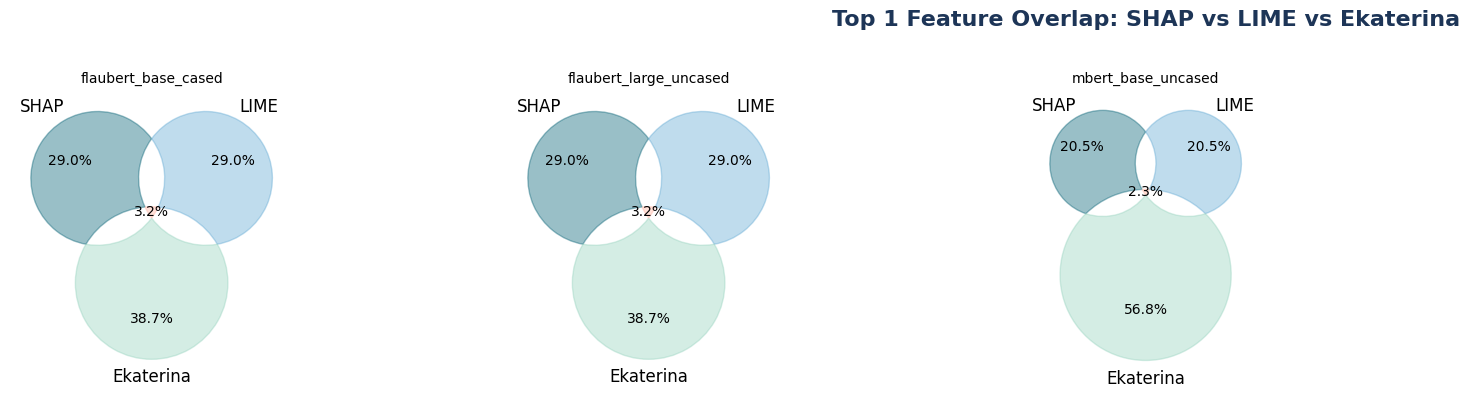

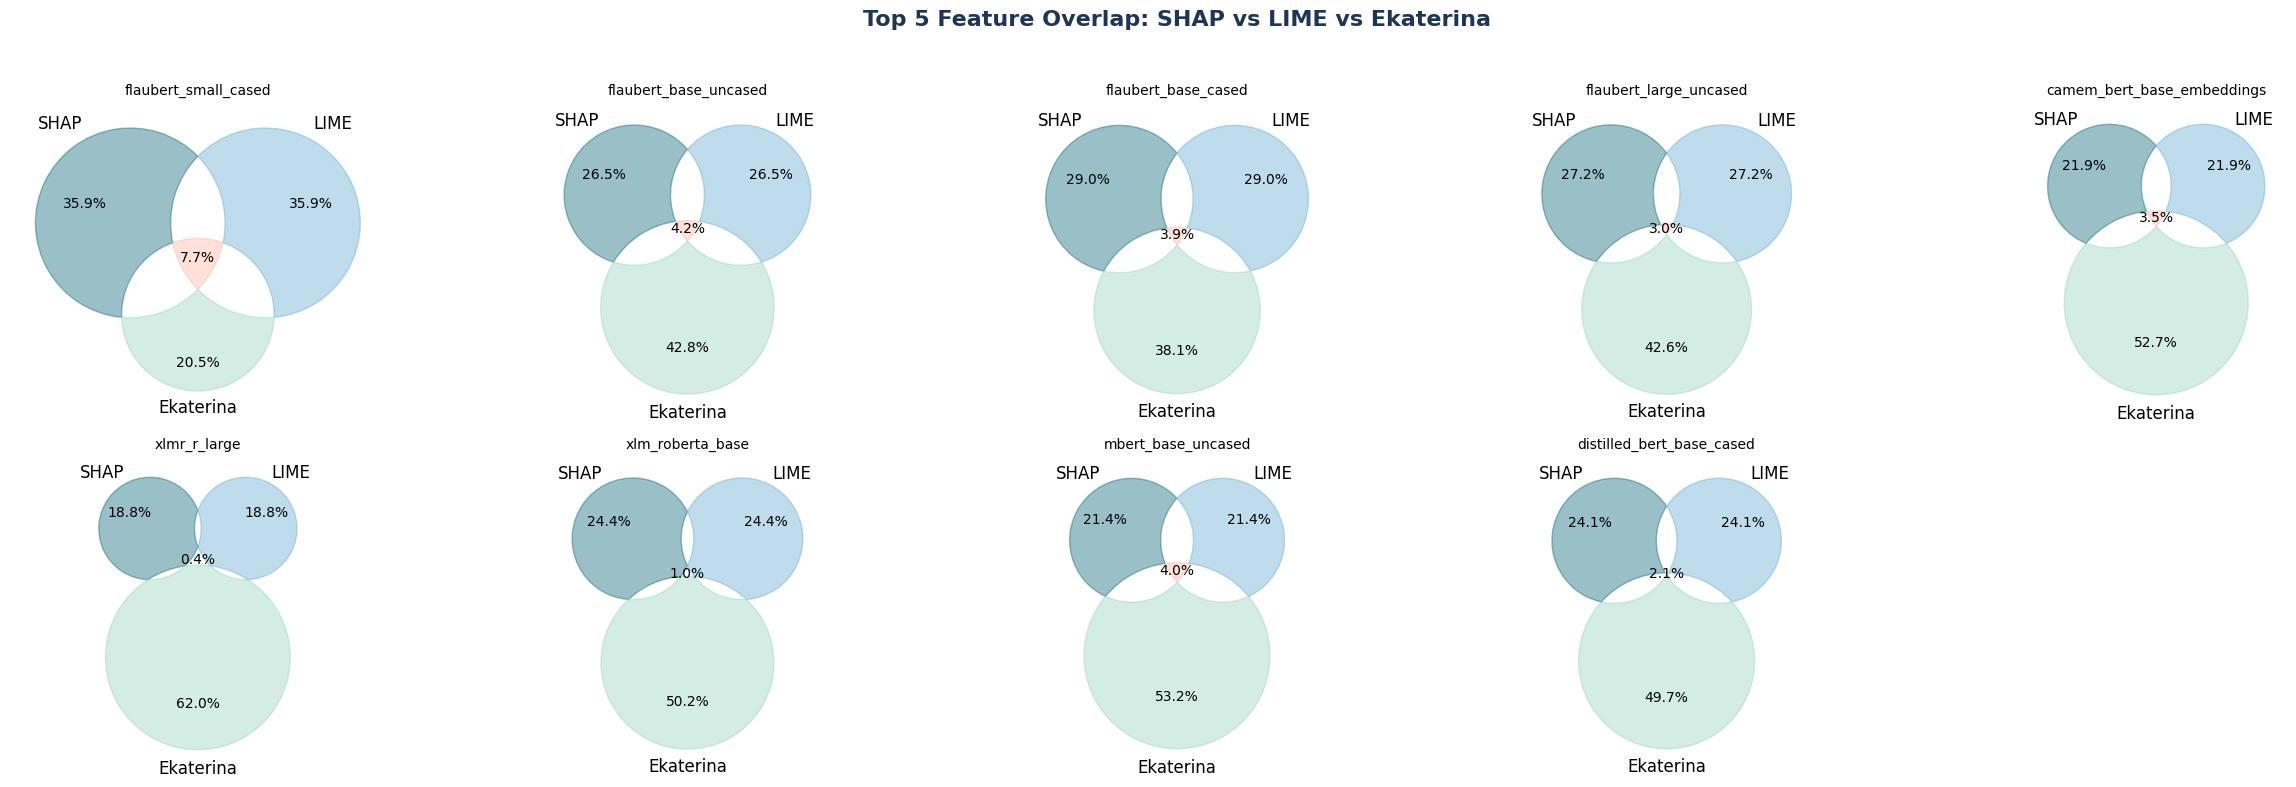

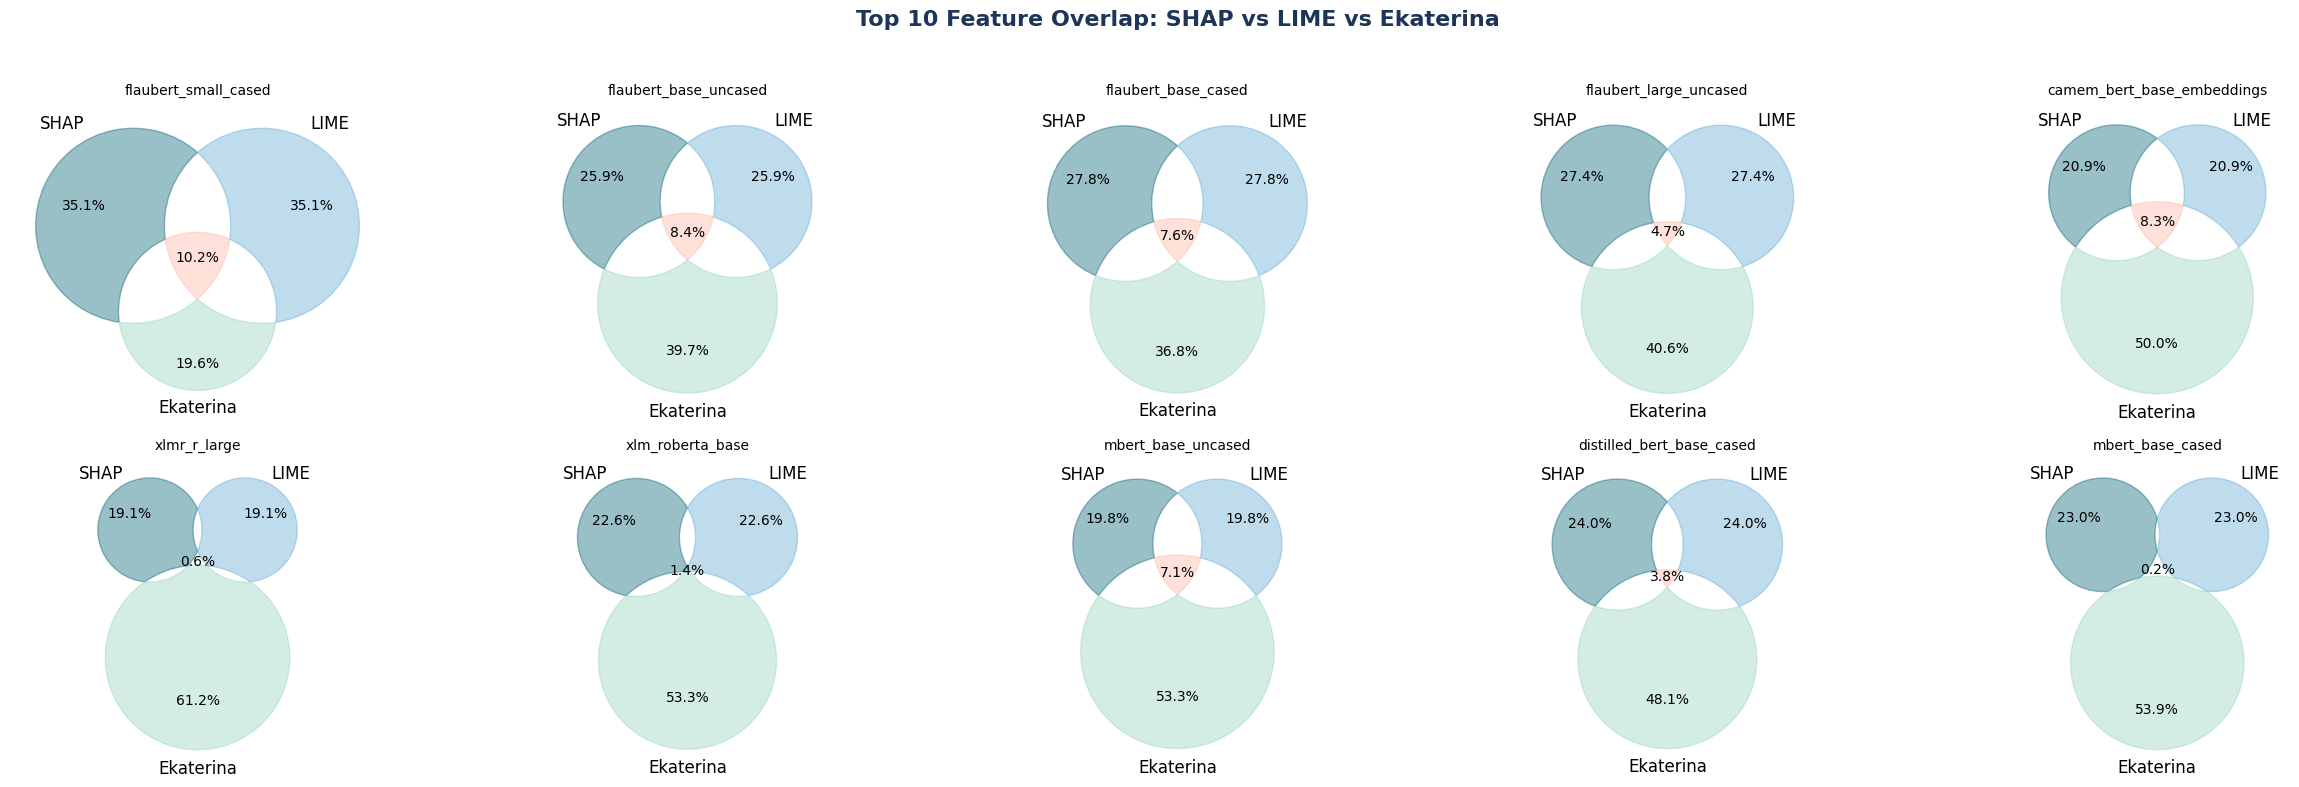

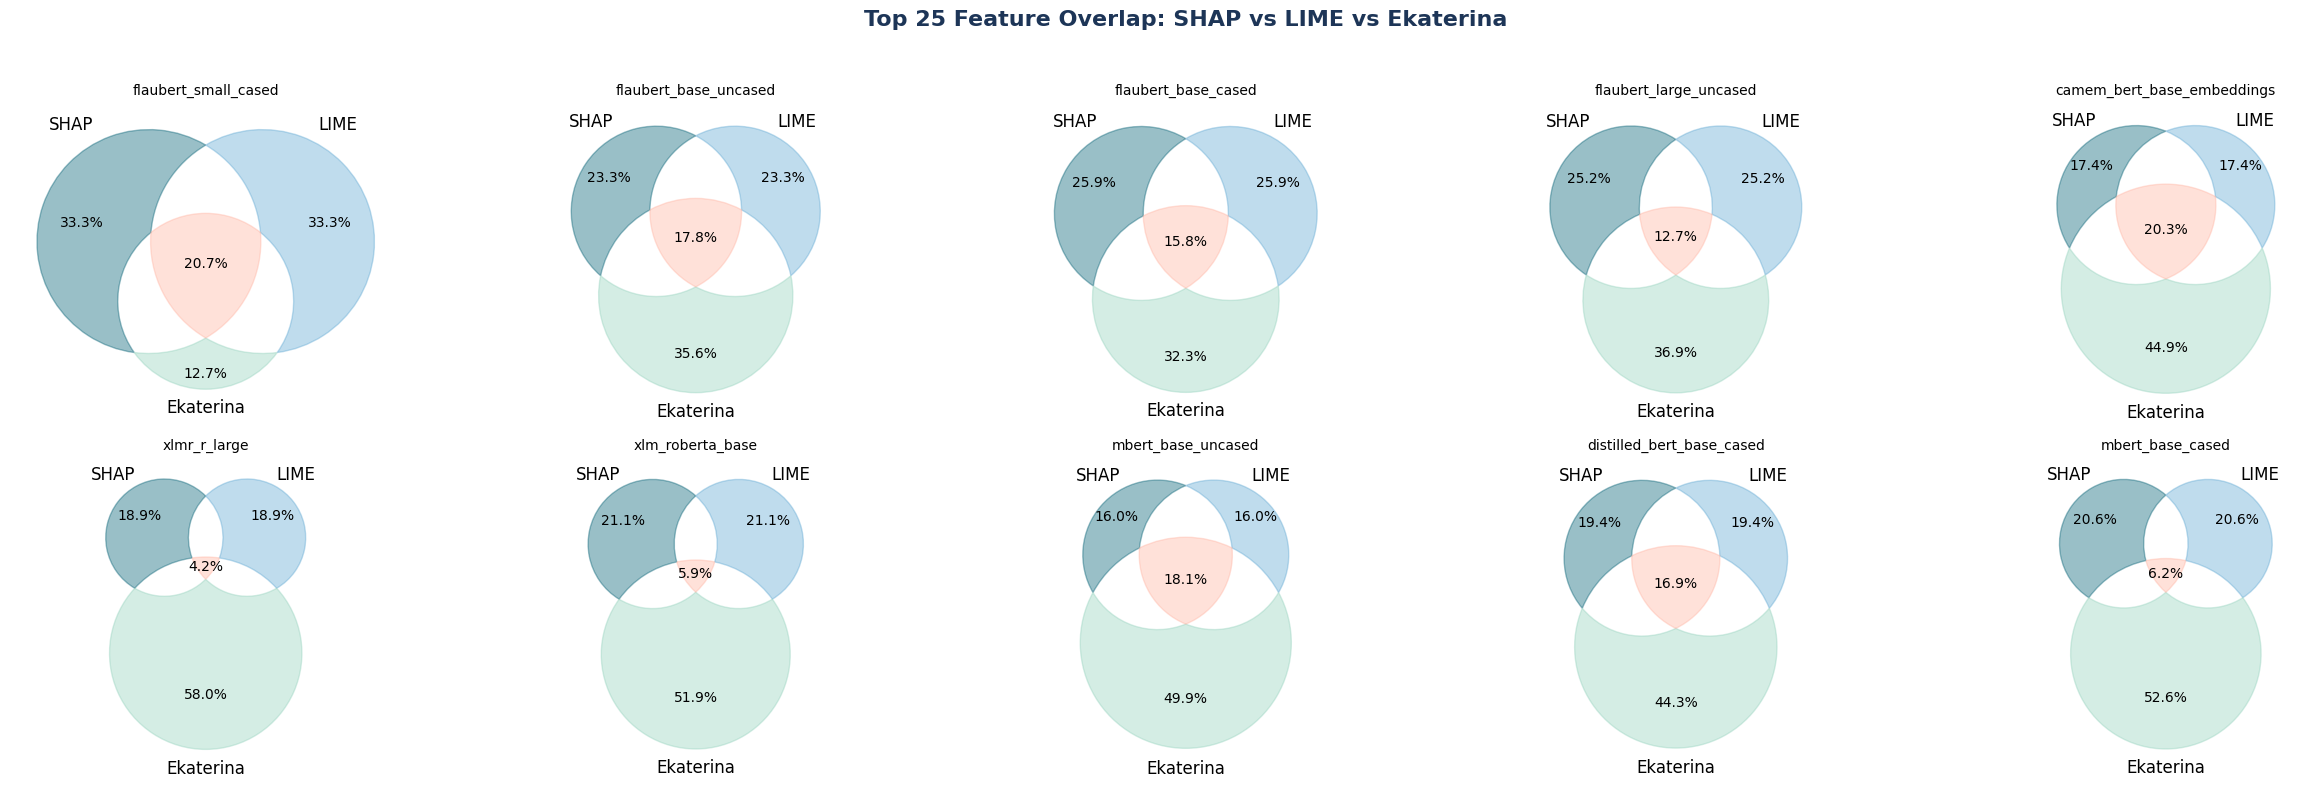

/usr/local/lib/python3.11/dist-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


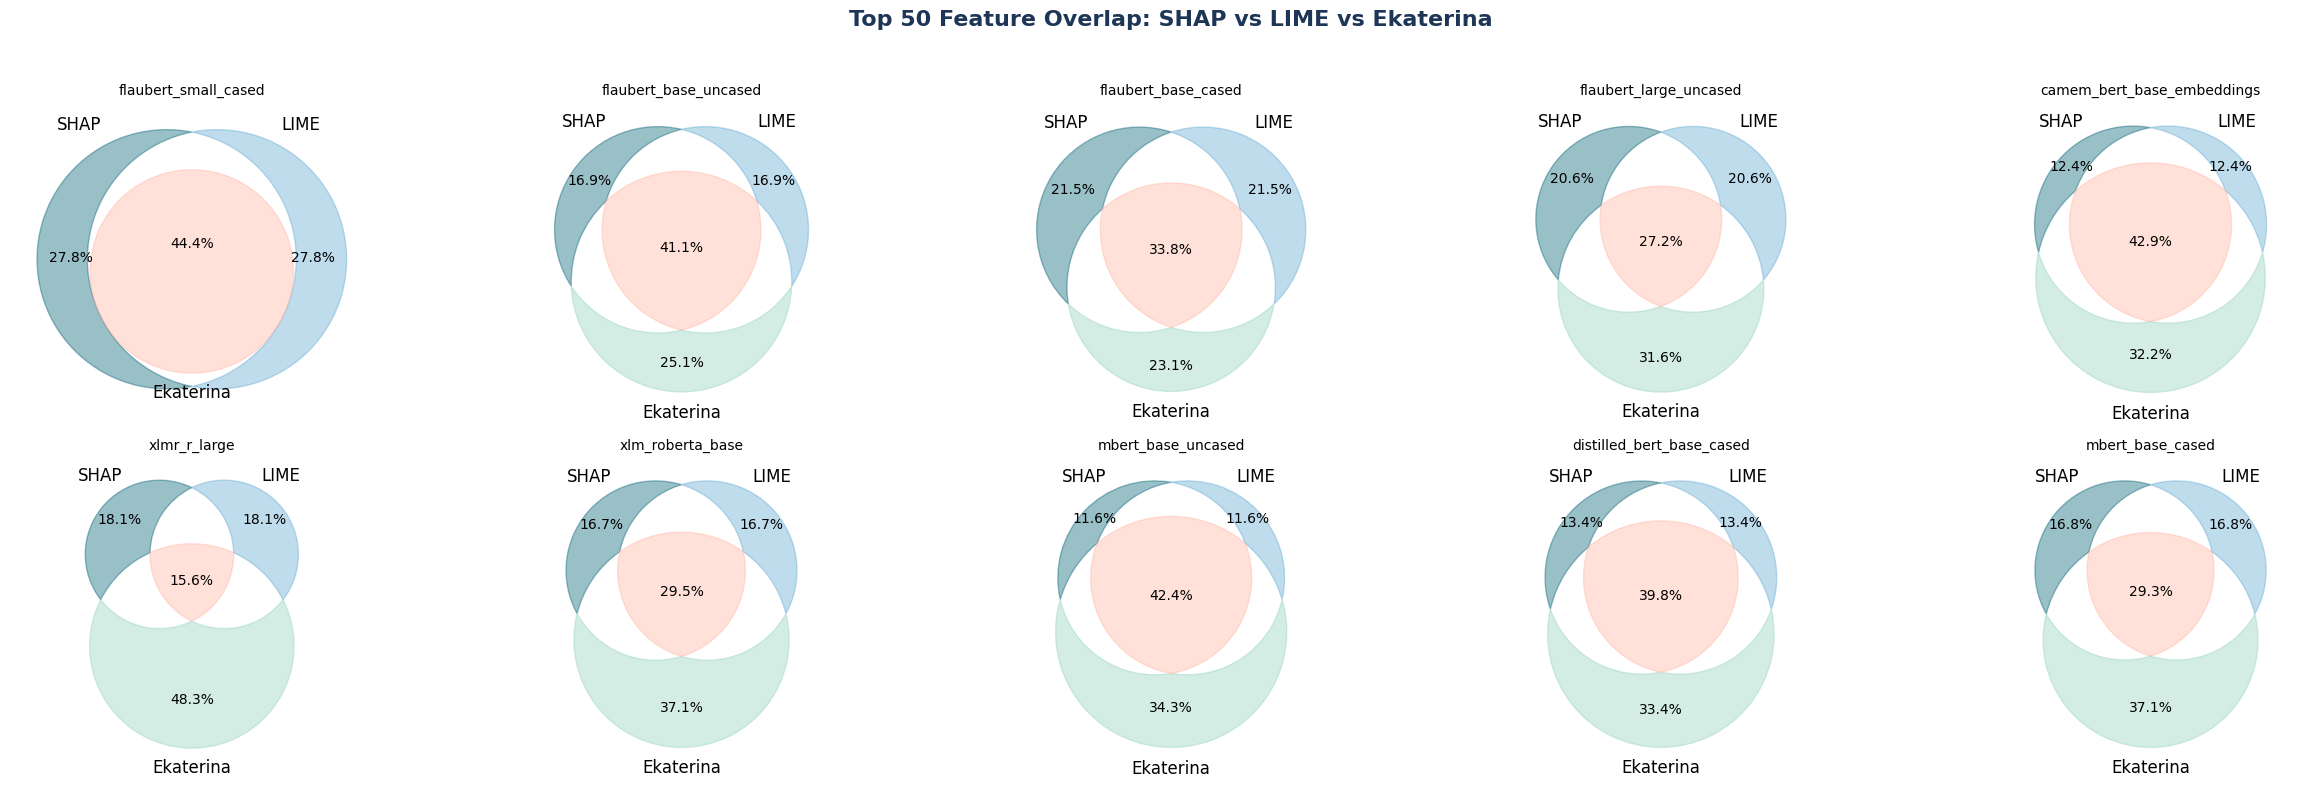

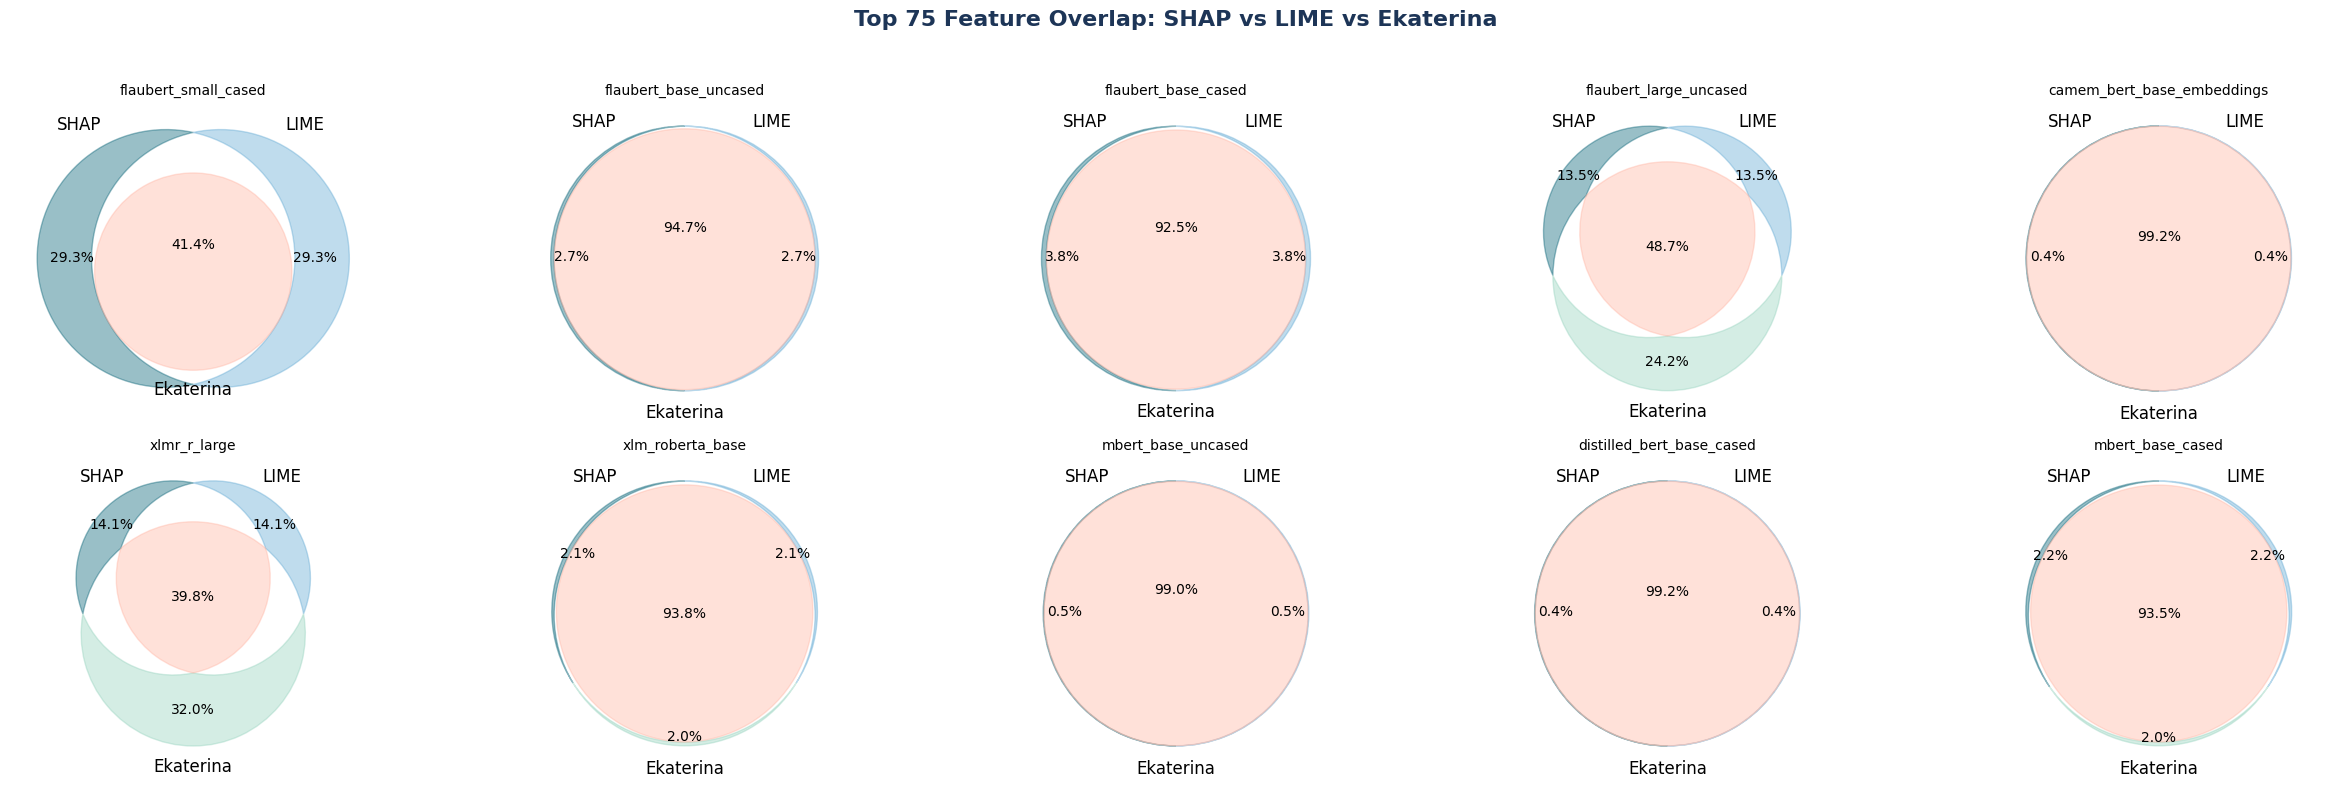

In [116]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import math

# Filter the overlap_df to remove rows with empty 'Common Features'
filtered_overlap_df = overlap_df[overlap_df['Common_Features'].astype(str) != '[]']

# Get unique percentage levels from the 'Top Percentage' column
percentage_levels = sorted(filtered_overlap_df["Percentage"].unique())

# Define grid layout
cols = 5  # Models per row

for percent in percentage_levels:
    df_filtered = filtered_overlap_df[filtered_overlap_df["Percentage"] == percent]
    num_models = len(df_filtered)
    rows = math.ceil(num_models / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for idx, (_, row) in enumerate(df_filtered.iterrows()):
        ax = axes[idx]

        # Get raw counts
        shap_total = row["TOTAL_SHAP_Features"]
        lime_total = row["TOTAL_LIME_Features"]
        ek_total = row["Ekaterina_Total_Dimensions"]
        common = row["Common_Features_Count"]

        only_shap = shap_total - common
        only_lime = lime_total - common
        only_ek   = ek_total - common
        total = only_shap + only_lime + only_ek + common


        # Convert to percentages of total
        only_shap_pct = (only_shap / total) * 100 if total > 0 else 0
        only_lime_pct = (only_lime / total) * 100 if total > 0 else 0
        only_ek_pct = (only_ek / total) * 100 if total > 0 else 0
        common_all_three_pct = (common / total) * 100 if total > 0 else 0

        # Draw the 3-set Venn diagram

        venn = venn3(
        subsets={
        '100': only_shap_pct,          # Only SHAP
        '010': only_lime_pct,          # Only LIME
        '001': only_ek_pct,            # Only EK
        '111': common_all_three_pct    # Common to all three
    },
      set_labels=("SHAP", "LIME", "Ekaterina"),
      ax=ax
)
        # Hide labels and patches for undefined or zero regions
        for region_id in ['110', '101', '011']:
          patch = venn.get_patch_by_id(region_id)
          label = venn.get_label_by_id(region_id)
          if patch:
            patch.set_visible(False)
          if label:
            label.set_visible(False)


        # Set custom colors
        if venn.get_patch_by_id('100'):
            venn.get_patch_by_id('100').set_color("#005f73")  # SHAP only
        if venn.get_patch_by_id('010'):
            venn.get_patch_by_id('010').set_color("#5fa8d3")  # LIME only
        if venn.get_patch_by_id('001'):
            venn.get_patch_by_id('001').set_color("#94d2bd")  # Ekaterina only
        if venn.get_patch_by_id('111'):
            venn.get_patch_by_id('111').set_color("#ffb4a2")  # SHAP, LIME, and Ekaterina

        # Add percentage text to each section
        if venn.get_label_by_id('100'):
            venn.get_label_by_id('100').set_text(f'{only_shap_pct:.1f}%')
        if venn.get_label_by_id('010'):
            venn.get_label_by_id('010').set_text(f'{only_lime_pct:.1f}%')
        if venn.get_label_by_id('001'):
            venn.get_label_by_id('001').set_text(f'{only_ek_pct:.1f}%')
        if venn.get_label_by_id('111'):
            venn.get_label_by_id('111').set_text(f'{common_all_three_pct:.1f}%')
            venn.get_label_by_id('11').set_fontsize(12)
            venn.get_label_by_id('11').set_fontweight('bold')
            venn.get_label_by_id('11').set_color('#1e3a8a')
             # Optional: adjust position of overlap label
            x, y = venn.get_label_by_id('11').get_position()
            venn.get_label_by_id('11').set_position((x + 0.1, y + 0.1))


        ax.set_title(f"{row['Model']}", fontsize=10)

    # Hide extra subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"Top {percent} Feature Overlap: SHAP vs LIME vs Ekaterina", fontsize=16, fontweight="bold", color="#1d3557")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
